#### HABUMUGISHA Emmanuel
#### 225229109

### Lab15. Text dataset creation and design of Simple RNN for Sentiment Analysis

In [18]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ISHIMWE K
[nltk_data]     AHMED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

In [22]:
#2. Creation of data

In [23]:
df = pd.read_csv("quotes.csv",encoding="ISO-8859-1")

In [24]:
df.head()

,Text,author,category,Label
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak...",1
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love...",1
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s...",1
3,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love",1
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive-out, hate, inspirational, ligh...",1


In [25]:
#3. Opening your CSV file

In [26]:
import csv

In [27]:
file = open('quotes.csv')

type(file)

_io.TextIOWrapper

In [28]:
csvreader = csv.reader(file)

In [29]:
header = []
header = next(csvreader)
header

['Text', 'author', 'category', 'Label']

In [30]:
# List of possible encodings to try
encodings_to_try = ['utf-8', 'ISO-8859-1', 'cp1252']  # Add more if needed

# Initialize an empty list to store rows
rows = []

# Try different encodings until one succeeds or all fail
for encoding in encodings_to_try:
    try:
        with open("quotes.csv", mode="r", encoding=encoding) as file:
            csvreader = csv.reader(file)

            # Iterate through the rows and append them to the list
            for row in csvreader:
                rows.append(row)
        # If we reach this point, encoding succeeded, so break out of the loop
        break
    except UnicodeDecodeError:
        # If encoding failed, continue to the next encoding in the list
        continue

# Now, the `rows` list contains all the rows from the CSV file
print(rows)


[['Text', 'author', 'category', 'Label'], ["I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.", 'Marilyn Monroe', 'attributed-no-source, best, life, love, mistakes, out-of-control, truth, worst', '1'], ["You've gotta dance like there's nobody watching,Love like you'll never be hurt,Sing like there's nobody listening,And live like it's heaven on earth.", 'William W. Purkey', 'dance, heaven, hurt, inspirational, life, love, sing', '1'], ["You know you're in love when you can't fall asleep because reality is finally better than your dreams.", 'Dr. Seuss', 'attributed-no-source, dreams, love, reality, sleep', '1'], ['A friend is someone who knows all about you and still loves you.', 'Elbert Hubbard', 'friend, friendship, knowledge, love', '1'], ['Darkness cannot drive out darkness: only light can do that. Hate cannot drive out hate: only l

In [31]:
file.close()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      99 non-null     object
 1   author    99 non-null     object
 2   category  99 non-null     object
 3   Label     99 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [33]:
#4. Pre-processing the text

In [34]:
y = df['Label']
X = df['Text']

In [35]:
#5. Dataset Preparation

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

In [37]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(69,)
(30,)
(69,)
(30,)


In [38]:
# 4th step to be continue
train_token = Tokenizer(num_words=100,oov_token='<oov>')
train_token.fit_on_texts(X_train)
word_index = train_token.word_index
train_sequence = train_token.texts_to_sequences(X_train)
dict(list(word_index.items())[0:10])

{'<oov>': 1,
 'you': 2,
 'to': 3,
 'and': 4,
 'the': 5,
 'a': 6,
 'i': 7,
 'in': 8,
 'love': 9,
 'of': 10}

In [39]:
vocab = len(train_token.word_index) + 1
vocab

850

In [40]:
train_sequence[3]

[41, 7, 1, 6, 1, 18, 1, 66, 7, 1, 10, 2, 7, 1, 1, 1, 37, 1, 84]

In [41]:
train_padded = pad_sequences(train_sequence,maxlen=100,padding='post')

In [42]:
train_padded[5]

array([15,  1,  1, 89,  1,  8,  1, 15,  1,  1, 89, 96, 15,  1, 34,  5, 66,
        4,  1,  1,  1, 97, 98, 17,  1, 99,  1, 15,  1, 78,  1,  1,  8,  1,
       15,  1,  1, 52,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [43]:
train_padded.shape

(69, 100)

In [44]:
val_token = Tokenizer(num_words=500,oov_token='<oov>')
val_token.fit_on_texts(X_val)
val_index = val_token.word_index
val_sequence = val_token.texts_to_sequences(X_val)

In [45]:
val_sequence[4]

[39,
 36,
 4,
 43,
 9,
 93,
 94,
 136,
 269,
 9,
 16,
 5,
 39,
 36,
 4,
 43,
 9,
 93,
 94,
 136,
 270,
 9,
 16]

In [46]:
val_padded = pad_sequences(val_sequence,maxlen=100,padding='post')

In [47]:
val_padded[4]

array([ 39,  36,   4,  43,   9,  93,  94, 136, 269,   9,  16,   5,  39,
        36,   4,  43,   9,  93,  94, 136, 270,   9,  16,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0])

In [48]:
#6. Model Creation

In [55]:
# Define vocabulary_size
vocabulary_size = len(val_token.word_index) + 1  # Add 1 for the OOV token

# Correct the model architecture
model = Sequential()
model.add(Embedding(input_dim=vocabulary_size, output_dim=70, input_length=100))
model.add(SimpleRNN(70, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [56]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 70)           21000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 70)                9870      
                                                                 
 dense (Dense)               (None, 1)                 71        
                                                                 
Total params: 30941 (120.86 KB)
Trainable params: 30941 (120.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
history=model.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
5/5 - 4s - loss: 0.6284 - accuracy: 0.9710 - 4s/epoch - 857ms/step
Epoch 2/10
5/5 - 0s - loss: 0.4052 - accuracy: 1.0000 - 182ms/epoch - 36ms/step
Epoch 3/10
5/5 - 0s - loss: 0.0139 - accuracy: 1.0000 - 210ms/epoch - 42ms/step
Epoch 4/10
5/5 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 220ms/epoch - 44ms/step
Epoch 5/10
5/5 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 197ms/epoch - 39ms/step
Epoch 6/10
5/5 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 190ms/epoch - 38ms/step
Epoch 7/10
5/5 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 168ms/epoch - 34ms/step
Epoch 8/10
5/5 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 189ms/epoch - 38ms/step
Epoch 9/10
5/5 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 220ms/epoch - 44ms/step
Epoch 10/10
5/5 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 190ms/epoch - 38ms/step


In [58]:
model.evaluate(val_padded,y_val)

1/1 [==============================] - 1s 619ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

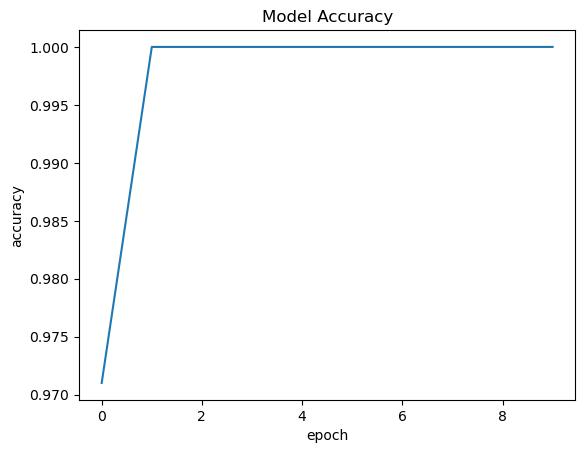

In [59]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

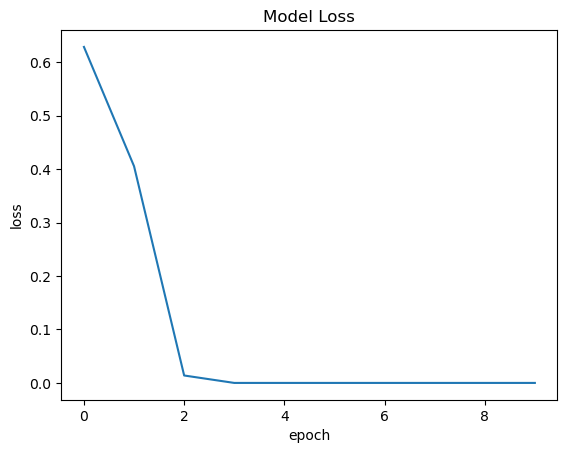

In [60]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [61]:
text = df["Text"]

In [62]:
#sent = [w.lower() for w in text.split() if not w in STOPWORDS]
trail_token = Tokenizer()
trail_token.fit_on_texts(text)
#word_index = trail_token.word_index
trail_seq = trail_token.texts_to_sequences(text)
#dict(list(word_index.items())[0:10])
trail_pad = pad_sequences(trail_seq,maxlen=100,padding='post')

In [63]:
trail_pad

array([[143, 291, 435, ...,   0,   0,   0],
       [295, 439, 440, ...,   0,   0,   0],
       [  1,  79, 126, ...,   0,   0,   0],
       ...,
       [  1, 121,  22, ...,   0,   0,   0],
       [  6,  59,  40, ...,   0,   0,   0],
       [ 49,   5, 426, ...,   6, 128,   7]])

In [66]:
res = model.predict(val_padded)
label = ['positive', 'negative']
print(res, label[np.argmax(res) > 0.5])


1/1 [==============================] - 0s 75ms/step
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] positive


C:\Users\ISHIMWE K AHMED\AppData\Local\Temp\ipykernel_14916\1332828384.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res, label[np.argmax(res) > 0.5])


In [67]:
#Model 2

In [68]:
model1 = Sequential()
# Embedding layer
model1.add(Embedding(5000,64,input_length=100))
model1.add(SimpleRNN(32,activation='tanh'))
model1.add(Embedding(5000,32,input_length=100))
model1.add(SimpleRNN(32,activation='tanh' ))
model1.add(Dense('1',activation='sigmoid'))

In [69]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                3104      
                                                                 
 embedding_3 (Embedding)     (None, 32, 32)            160000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 485217 (1.85 MB)
Trainable params: 485217 (1.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [71]:
history1=model1.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
5/5 - 3s - loss: 0.4696 - accuracy: 1.0000 - 3s/epoch - 585ms/step
Epoch 2/10
5/5 - 0s - loss: 0.3185 - accuracy: 1.0000 - 66ms/epoch - 13ms/step
Epoch 3/10
5/5 - 0s - loss: 0.2199 - accuracy: 1.0000 - 66ms/epoch - 13ms/step
Epoch 4/10
5/5 - 0s - loss: 0.1497 - accuracy: 1.0000 - 64ms/epoch - 13ms/step
Epoch 5/10
5/5 - 0s - loss: 0.1032 - accuracy: 1.0000 - 60ms/epoch - 12ms/step
Epoch 6/10
5/5 - 0s - loss: 0.0734 - accuracy: 1.0000 - 52ms/epoch - 10ms/step
Epoch 7/10
5/5 - 0s - loss: 0.0544 - accuracy: 1.0000 - 52ms/epoch - 10ms/step
Epoch 8/10
5/5 - 0s - loss: 0.0419 - accuracy: 1.0000 - 64ms/epoch - 13ms/step
Epoch 9/10
5/5 - 0s - loss: 0.0335 - accuracy: 1.0000 - 60ms/epoch - 12ms/step
Epoch 10/10
5/5 - 0s - loss: 0.0275 - accuracy: 1.0000 - 52ms/epoch - 10ms/step


In [72]:
model1.evaluate(val_padded,y_val)

1/1 [==============================] - 0s 257ms/step - loss: 0.0246 - accuracy: 1.0000


[0.02459939941763878, 1.0]

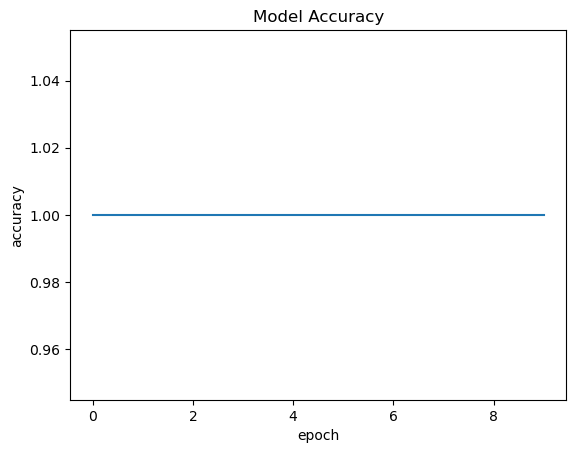

In [73]:
plt.plot(history1.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

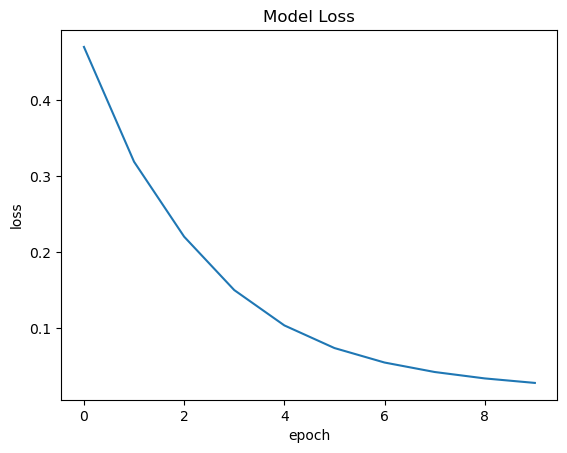

In [74]:
plt.plot(history1.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [75]:
res = model1.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

4/4 [==============================] - 0s 7ms/step
[[0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007 ]
 [0.9757007

C:\Users\ISHIMWE K AHMED\AppData\Local\Temp\ipykernel_14916\2701450631.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])


In [76]:
#Model 3

In [77]:
model2 = Sequential()
# Embedding layer
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh'))
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='relu' ))
model2.add(Embedding(4000,128,input_length=100))
model2.add(SimpleRNN(64,activation='tanh' ))
model2.add(Dense('1',activation='sigmoid'))

In [78]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 128)          512000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 64)                12352     
                                                                 
 embedding_5 (Embedding)     (None, 64, 128)           512000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                12352     
                                                                 
 embedding_6 (Embedding)     (None, 64, 128)           512000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense_3 (Dense)             (None, 1)                

In [79]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
history2=model2.fit(train_padded,y_train,epochs=10,verbose=2,batch_size=15)

Epoch 1/10
5/5 - 2s - loss: 0.5487 - accuracy: 1.0000 - 2s/epoch - 316ms/step
Epoch 2/10
5/5 - 0s - loss: 0.2392 - accuracy: 1.0000 - 165ms/epoch - 33ms/step
Epoch 3/10
5/5 - 0s - loss: 0.0884 - accuracy: 1.0000 - 182ms/epoch - 36ms/step
Epoch 4/10
5/5 - 0s - loss: 0.0371 - accuracy: 1.0000 - 173ms/epoch - 35ms/step
Epoch 5/10
5/5 - 0s - loss: 0.0191 - accuracy: 1.0000 - 138ms/epoch - 28ms/step
Epoch 6/10
5/5 - 0s - loss: 0.0116 - accuracy: 1.0000 - 125ms/epoch - 25ms/step
Epoch 7/10
5/5 - 0s - loss: 0.0081 - accuracy: 1.0000 - 126ms/epoch - 25ms/step
Epoch 8/10
5/5 - 0s - loss: 0.0062 - accuracy: 1.0000 - 126ms/epoch - 25ms/step
Epoch 9/10
5/5 - 0s - loss: 0.0050 - accuracy: 1.0000 - 134ms/epoch - 27ms/step
Epoch 10/10
5/5 - 0s - loss: 0.0043 - accuracy: 1.0000 - 139ms/epoch - 28ms/step


In [81]:
model2.evaluate(val_padded,y_val)

1/1 [==============================] - 0s 330ms/step - loss: 0.0039 - accuracy: 1.0000


[0.003931945189833641, 1.0]

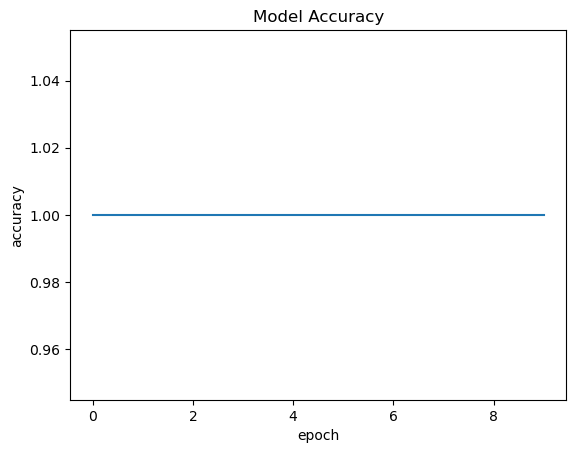

In [82]:
plt.plot(history2.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

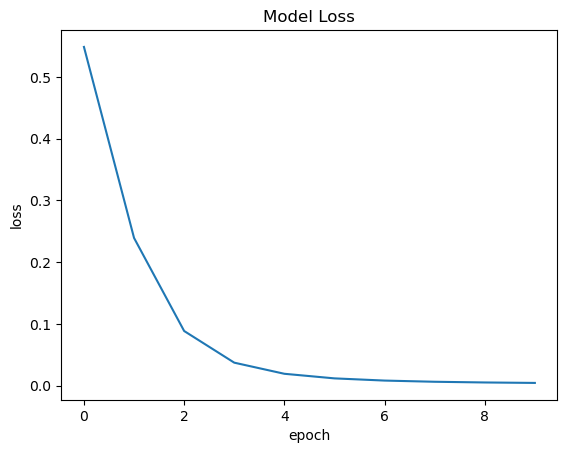

In [83]:
plt.plot(history2.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [84]:
res = model2.predict(trail_pad)
label = ['positive','negative']
print(res,label[np.argmax(trail_pad)>50])

4/4 [==============================] - 0s 13ms/step
[[0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.99607575]
 [0.996075

C:\Users\ISHIMWE K AHMED\AppData\Local\Temp\ipykernel_14916\479605851.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print(res,label[np.argmax(trail_pad)>50])
